In [8]:
import cv2
print(cv2.__version__)

import matplotlib.pyplot as plt

%matplotlib inline

4.5.2


In [5]:
def read_video(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    images = []
    while True:
        was_read, image =  cap.read()
        if was_read:
            images.append(image)
        else:
            break
    
    return images, fps

In [7]:
video_path = 'people.mp4'
images, fps = read_video(video_path)
print(len(images))

323


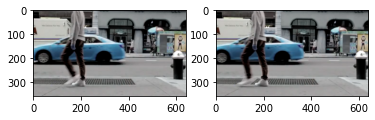

In [24]:
i = 130
image1, image2 = images[i], images[i+1]

fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i])
ax[1].imshow(images[i+1])
plt.show()

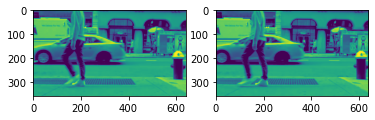

In [30]:
frame1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
frame2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(frame1)
ax[1].imshow(frame2)
plt.show()


In [31]:
nvof = cv2.cuda_NvidiaOpticalFlow_1_0.create(frame1.shape[1], frame1.shape[0], 5, False, False, False, 0)

flow = nvof.calc(frame1, frame2, None)

flowUpSampled = nvof.upSampler(flow[0], frame1.shape[1], frame1.shape[0], nvof.getGridSize(), None)

cv2.writeOpticalFlow('OpticalFlow.flo', flowUpSampled)

nvof.collectGarbage()

AttributeError: module 'cv2.cv2' has no attribute 'cuda_NvidiaOpticalFlow_1_0'